#### M6_AG1_CLASIFICACIÓN DE NOTICIAS (HUFFPOST)
#### andres yanez y paul camacho
#### 20220629

#### Importamos las librerias

In [1]:
#pip install nltk
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB

### Carga de los datos
Una vez cargados los cerca de 200K registros, filtramos los cinco temas que nos interesan para generar el modelo multiclase, lo que nos da cerca de 47K registros. Aun con este filtro, en local, por tema de capacidad computacional, no logramos ejecutar todos los pasos, salvo seleccionemos menos de 25K, cantidad que utilizamos para este este ejercicio. El dataframe original tiene 6 variables: Category, headline, authors, link, short_description y date, de las cuales solo vamos a utilizar category y headline.

In [2]:
df = pd.read_json(r"./act_grupal_News_Category_Dataset_v2.json", lines=True)
df =df[['category', 'headline']]
df= df[df['category'].isin(['WELLNESS','PARENTING','TRAVEL','BUSINESS','SPORTS'])]
print(len(df))
df = df.sample(n=25000,random_state=1234)
print(len(df))
print(df.head())

47212
25000
         category                                           headline
127503   WELLNESS         You Are Right Where You Are Supposed To Be
156503  PARENTING  Jill Trahan-Hardy, Mother, Becomes Daughter's ...
189178     SPORTS  Caroline Wozniacki Upset By Kaia Kanepi At Fre...
159617     TRAVEL  Take the Kids to Washington DC for Fun, Educat...
134370   WELLNESS                         What Makes A Healthy Diet?


In [3]:
# informacion del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 127503 to 125639
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  25000 non-null  object
 1   headline  25000 non-null  object
dtypes: object(2)
memory usage: 585.9+ KB


In [4]:
# numero de registros por clase
df["category"].value_counts()

WELLNESS     9490
TRAVEL       5157
PARENTING    4590
BUSINESS     3113
SPORTS       2650
Name: category, dtype: int64

In [5]:
# frecuencia de cada clase
df["category"].value_counts()/len(df)

WELLNESS     0.37960
TRAVEL       0.20628
PARENTING    0.18360
BUSINESS     0.12452
SPORTS       0.10600
Name: category, dtype: float64

In [7]:
# titulares
df["headline"].values

array(['You Are Right Where You Are Supposed To Be',
       "Jill Trahan-Hardy, Mother, Becomes Daughter's Bodyguard At School In Toronto To Stop Bullying",
       'Caroline Wozniacki Upset By Kaia Kanepi At French Open (VIDEO)',
       ..., 'Dare to Be 100: My Doctor Is a P.A.',
       'Medical Specialists Will Try to Reduce Excessive Diagnostic Testing',
       'The Gluten-Free Challenge -- Are You With Me?'], dtype=object)

In [8]:
# cargamos las stopwords 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ayanez3\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
# utilizamos stopword del idioma ingles
print(stopwords.words('english'))
len(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

179

In [12]:
# aplicamos tfif vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))
fitted_vectorizer=tfidf_vectorizer.fit(df["headline"].values)
vect=fitted_vectorizer.transform(df["headline"].values)
vect.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
# generamos el dataframe del modelo donde cada variable corresponde a una palabra. Casi 20 mil columnas!   
vocab = np.sort(list(tfidf_vectorizer.vocabulary_.keys()))
df_tf = pd.DataFrame(vect.todense(), columns = vocab)
print(df_tf.shape)
df_tf.head()

(25000, 19818)


,00,000,000th,007,01,012,014,083,10,100,...,zuniga,zurich,zurlon,zvovushe,zyberk,zylowska,zyola,zzs,zzzs,étretat
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# valor maximo en cada fila
print(pd.DataFrame({'max':df_tf.max(axis=1), 'idmax':df_tf.idxmax(axis=1) }))

            max        idmax
0      0.842073     supposed
1      0.388389       trahan
2      0.422071         kaia
3      0.474660           dc
4      0.611135         diet
...         ...          ...
24995  0.546606        check
24996  0.732636         hope
24997  0.627700         dare
24998  0.466367  specialists
24999  0.645886       gluten

[25000 rows x 2 columns]


Aplicamos split a los datos para generar datos de train (70%) y test (30%)

In [15]:
X = df_tf.values # columna headline vectorizada
y = df["category"].values # columna category 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1234, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


(17500, 19818) (17500,)
(7500, 19818) (7500,)


In [16]:
# elaboramos un primer modelo multinomial, con alpha = 1.0
mnb_model = MultinomialNB(alpha=1.0)
mnb_model.fit(X_train, y_train)
pred_train = mnb_model.predict(X_train)
pred_test = mnb_model.predict(X_test)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*mnb_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*mnb_model.score(X_test, y_test)))

Precisión sobre los datos de entrenamiento: 82.33
Precisión sobre los datos de test: 72.21


Este primer modelo arroja para el train un score de 82% y 72% para el test. Si bien hay solo 10 puntos de diferencia, lo valores son bajos. Es necesario refinar el modelo.   

Confusion matrix:



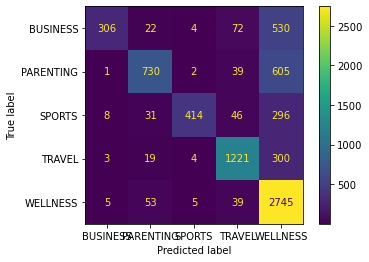

In [17]:
print(f"Confusion matrix:\n")
disp = ConfusionMatrixDisplay.from_estimator(mnb_model, X_test, y_test, cmap=plt.cm.viridis)
plt.show()

Esta primera matriz de confusión nos muestra que la clase con mayor acierto es "WELLNESS", seguido de "TRAVEL". "SPORT" y "BUSINESS" estan muy por abajo.

#### Optimización del modelo

In [18]:
# iteramos para graficar accuracy de train vs test, donde en cada iteracion modificamos alpha, desde 0.1 a 1.0,  en pasos de 0.1
md_list = []
score_train_list = []
score_test_list = []
for newalpha in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
  model = MultinomialNB(alpha=newalpha)
  model.fit(X_train, y_train)
  md_list.append(newalpha)
  score_train_list.append(100.0*model.score(X_train, y_train))
  score_test_list.append(100.0*model.score(X_test, y_test))

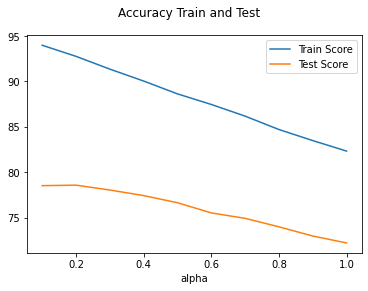

In [19]:
# generamos dataframe y graficamos estos valores
df = pd.DataFrame({"alpha":md_list, "score_train":score_train_list, "score_test":score_test_list})
df.set_index("alpha", inplace=True)
df["score_train"].plot(label="Train Score")
df["score_test"].plot(label="Test Score")
plt.suptitle("Accuracy Train and Test")
plt.legend()
plt.show()

In [20]:
df

,score_train,score_test
alpha,,
0.1,93.982857,78.520000
0.2,92.760000,78.573333
0.3,91.354286,78.040000
0.4,90.040000,77.426667
0.5,88.628571,76.640000
0.6,87.462857,75.520000
0.7,86.177143,74.920000
0.8,84.702857,73.986667
0.9,83.485714,72.973333


Observamos que en 0.2 hay un punto de quiebre donde la curva empieza a bajar. Elegimos este valor para nuestro modelo definitivo porque presenta un buen equilibrio entre train y test, a fin de  minimizar overfitting y underfitting. 

In [21]:
# aplicamos alpha = 0.2 a nuestro modelo multinomial definitivo
mnb_model = MultinomialNB(alpha=0.2)
mnb_model.fit(X_train, y_train)
pred_train = mnb_model.predict(X_train)
pred_test = mnb_model.predict(X_test)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*mnb_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*mnb_model.score(X_test, y_test)))

Precisión sobre los datos de entrenamiento: 92.76
Precisión sobre los datos de test: 78.57


El modelo arroja para el train un score de 93% y 79% para el test. Estos 12 puntos de diferencia no estan nada mal considerando que solo utilizamos 25K registros.   

Confusion matrix:



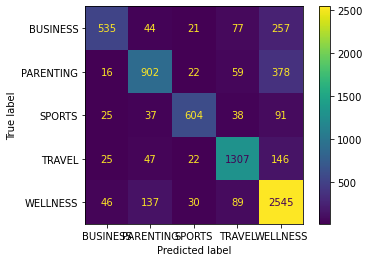

In [23]:
print(f"Confusion matrix:\n")
disp = ConfusionMatrixDisplay.from_estimator(mnb_model, X_test, y_test, cmap=plt.cm.viridis)
plt.show()

Observamos en esta matriz de confusión que si bien "WELLNESS" ha bajado levemente, sigue siendo la clase con mayor desempeño. El resto de las clases ha mejorado.
Creemos que este modelo generaliza correctamente, evitando under y overfitting.  

#### Carga del archivo generado en el scraping
Es necesario destacar que hemos desarrollado dos rutinas para la descarga automática de estos registros: Primero tenemos el scraper de la páginas web del sitio huffpost.com. Es efectiva pero requiere mucha mantención por los constantes cambios en los elementos de estructura y navegación que se realizan en ese portal. También hemos desarrollado una rutina que consume directamente desde la API. Ambas soluciones generan un csv con los resultados.   

In [24]:
# carga de los datos
df2 = pd.read_csv(r"./huffpost.csv", sep=",")
df2 = df2[df2['category'].isin(['WELLNESS','PARENTING','TRAVEL','BUSINESS','SPORTS'])]
print(df2.head())
print(len(df2))

   category                                           headline
0  WELLNESS  Don’t Have Time For A Big Workout? Try ‘Exerci...
1  WELLNESS  New COVID Booster Shots May Be Coming This Fal...
2  WELLNESS  10 ‘Harmless’ Nighttime Habits That Are Secret...
3  WELLNESS  The Difference Between Having Strong Feelings ...
4  WELLNESS  10 Common Behaviors That Are Making You More F...
100


In [25]:
# aplicamos el mismo vectorizer del modelo
vect=fitted_vectorizer.transform(df2["headline"].values)

In [26]:
# generamos el dataframe con las palabras en las columnas
df2_tf = pd.DataFrame(vect.todense(), columns = vocab)
print(df2_tf.shape)
df2_tf.head()

(100, 19818)


,00,000,000th,007,01,012,014,083,10,100,...,zuniga,zurich,zurlon,zvovushe,zyberk,zylowska,zyola,zzs,zzzs,étretat
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.212057,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.270469,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# generamos el X e y
X_huff = df2_tf.values
y_huff = df2["category"].values
print (X_huff.shape, y_huff.shape)

(100, 19818) (100,)


In [28]:
# aplicamos la predicción
pred_test = mnb_model.predict(X_huff)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*mnb_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*mnb_model.score(X_huff, y_huff)))

Precisión sobre los datos de entrenamiento: 92.76
Precisión sobre los datos de test: 73.00


El modelo arroja un score de 93% para el train y 73% para el test. Estos 20 puntos de diferencia hablan de la presencia de overfitting, talvez debido a que solo utilizamos 25K registros para entrenar el modelo y una muestra de solo 100 registros para esta predicción. 

Confusion matrix:



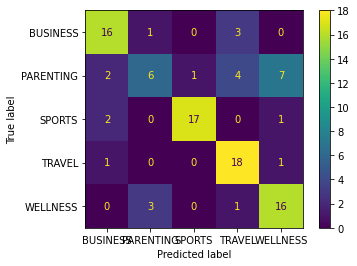

In [29]:
print(f"Confusion matrix:\n")
disp = ConfusionMatrixDisplay.from_estimator(mnb_model, X_huff, y_huff, cmap=plt.cm.viridis)
plt.show()

#### Conclusión
Observamos en esta matriz de confusión que "TRAVEL" es la clase con mejor desempeño con un recall de 19/20 = 95% y precision de 19/28 = 68%. Le siguen "SPORTS", "WELLNESS" y "BUSINESS". Muy por abajo esta "PARENTING", con un recall de 8/20 = 40% y precision de 8/10= 80%.<br>
Sin duda, ultizando todos los registros del json para entrenar el modelo obtendríamos un mejor resultado. Esto en el mundo actual ya no es problema porque probablemente se utilizaría procesamiento en la nube, por ejemplo una EC2 en AWS, donde el tamaño de la máquina es configurable y se puede rentar por el tiempo que solo sea necesario.   